# Proyek Analisis Data: Bike Sharing Dataset
- Nama: M HAIKAL FEBRIAN P
- Email: haikalphona23@gmail.com
- Id Dicoding: haikalkuy

## Menentukan Pertanyaan Bisnis

- Is there a role for weather in the number of bicycle users?
- Is there a seasonal influence on bicycle renters based on Casual and Registered customers?
-How can variables such as temp and atemp and humidity affect the total number of bicycle users (both Casual and Registered)?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
df1 = pd.read_csv('hour.csv')
dt = pd.read_csv('day.csv')
df = pd.concat([df1, dt])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0.0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1.0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2.0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3.0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4.0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18110 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   hr          17379 non-null  float64
 6   holiday     18110 non-null  int64  
 7   weekday     18110 non-null  int64  
 8   workingday  18110 non-null  int64  
 9   weathersit  18110 non-null  int64  
 10  temp        18110 non-null  float64
 11  atemp       18110 non-null  float64
 12  hum         18110 non-null  float64
 13  windspeed   18110 non-null  float64
 14  casual      18110 non-null  int64  
 15  registered  18110 non-null  int64  
 16  cnt         18110 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 2.5+ MB


In [5]:
df.isna().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [6]:
print("Number of data duplications: ", df.duplicated().sum())

Number of data duplications:  0


In [7]:
df.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [8]:
df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,18110.000000,18110,18110.000000,18110.000000,18110.000000,17379.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8354.006405,NaN,2.501436,0.502485,6.537051,11.546752,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033
std,5180.771860,NaN,1.107045,0.500008,3.439213,6.914405,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3797.250000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000
50%,8324.500000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000
75%,12851.750000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000


In [9]:
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (18110, 17) 
 Total Rows are : 18110
 Total Columns are : 17


### Cleaning Data

In [10]:
drop_col = ['instant', 'windspeed']

for i in df.columns:
  if i in drop_col:
    df.drop(labels=i, axis=1, inplace=True)

df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0.0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1.0,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2.0,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3.0,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4.0,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [11]:
df['dteday'] = df['dteday'].astype('datetime64[ns]')

In [12]:
df['Month'] = df['dteday'].dt.month

df['Day'] = df['dteday'].dt.day_name()

In [13]:
df.drop(['dteday',"Day","Month"],axis=1 ,inplace=True)

In [14]:
seasons_mapping = {1: 'winter',
                   2: 'spring',
                   3: 'summer',
                   4: 'fall'}
df['season'] = df['season'].map(seasons_mapping)

In [15]:
df['mnth'] = df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

In [16]:
df['weekday'] = df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [17]:
df['weathersit'] = df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                   atemp                    hum                
         max   min      mean     max     min      mean  max   min      mean
season                                                                     
fall    0.76  0.14  0.423129  0.6818  0.1515  0.415730  1.0  0.16  0.667189
spring  0.94  0.16  0.544653  0.8788  0.1667  0.520537  1.0  0.16  0.627019
summer  1.00  0.38  0.706406  1.0000  0.2424  0.655999  1.0  0.16  0.633180
winter  0.72  0.02  0.299089  0.6515  0.0000  0.298067  1.0  0.00  0.581412

In [19]:
df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                        
       max min        mean     sum
mnth                              
Apr   7460   1  359.511022  538188
Aug   7865   1  456.986337  702388
Dec   6606   1  273.185761  422072
Feb   5062   1  216.526466  302704
Jan   4521   1  180.996647  269866
Jul   8173   1  445.094194  689896
Jun   8120   1  461.789333  692684
Mar   8362   1  298.267101  457840
May   8294   1  427.981935  663372
Nov   6852   1  340.455578  509662
Oct   8156   1  426.109716  644704
Sep   8714   1  462.245825  691982

In [20]:
df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual  registered   cnt                
             mean        mean   max min        mean
season                                             
fall    58.858050  322.825850  8555   1  381.683900
spring  88.622687  311.372523  8362   1  399.995210
summer  96.537575  356.549103  8714   1  453.086678
winter  27.412164  185.722813  7836   1  213.134976

In [21]:
numeric_features = df.describe().columns
numeric_features

Index(['yr', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [22]:
categorical_columns = list(set(df.columns) - set(numeric_features))
categorical_columns

['weekday', 'season', 'mnth', 'weathersit']

## Visualization & Explanatory Analysis

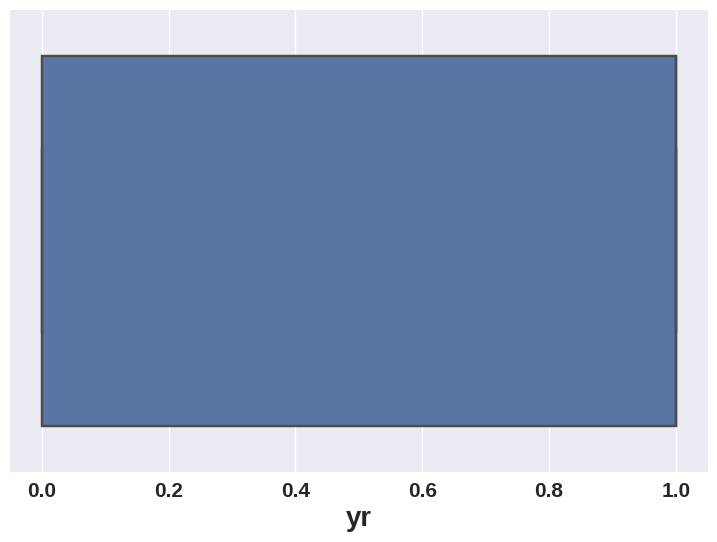

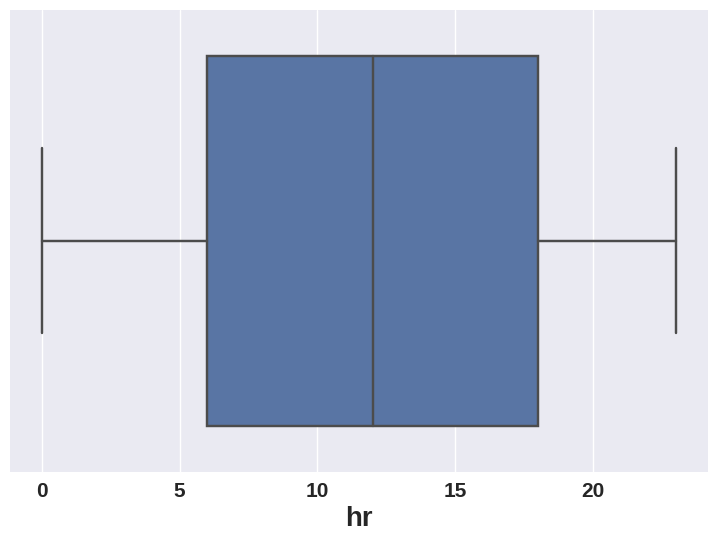

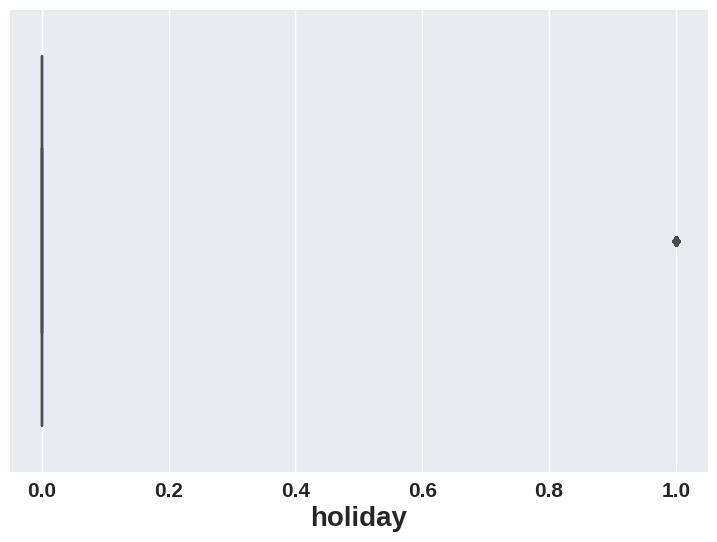

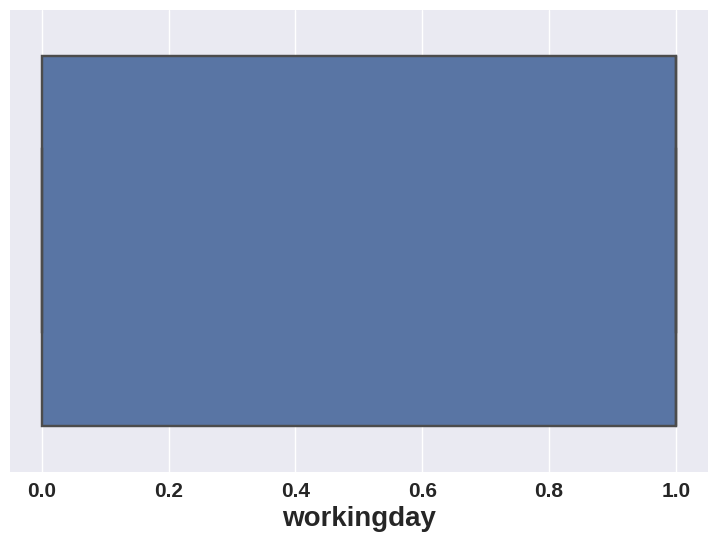

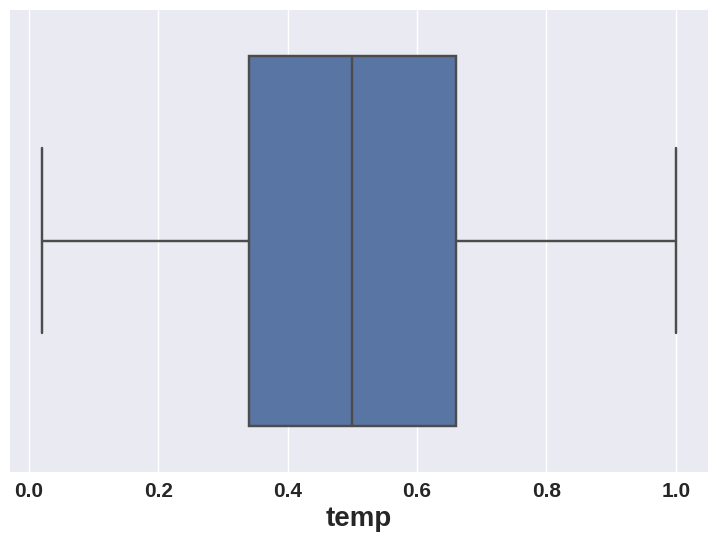

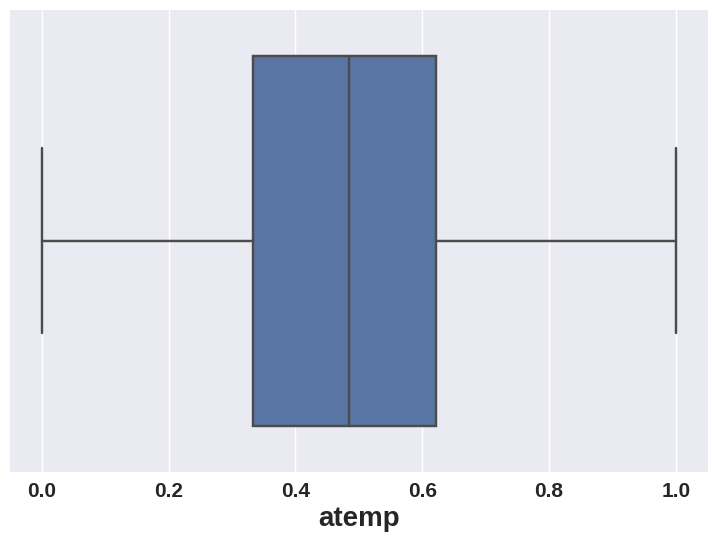

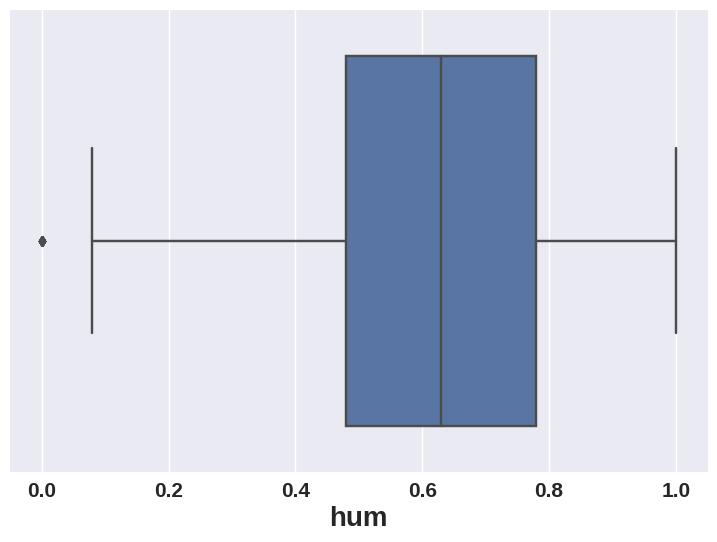

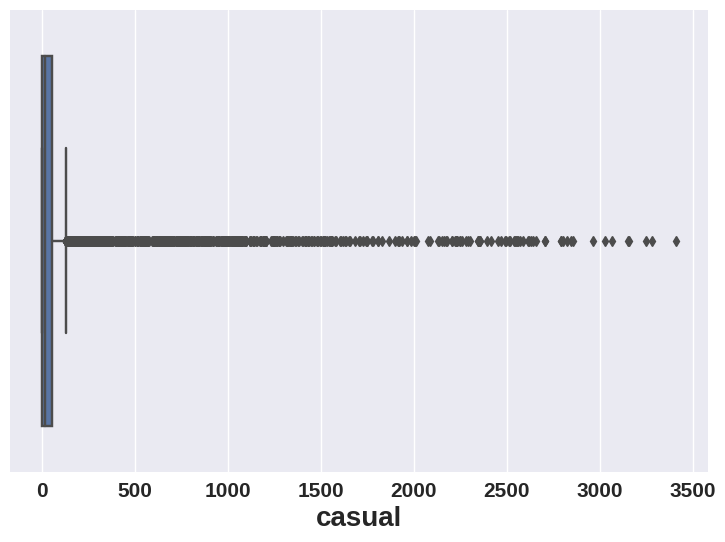

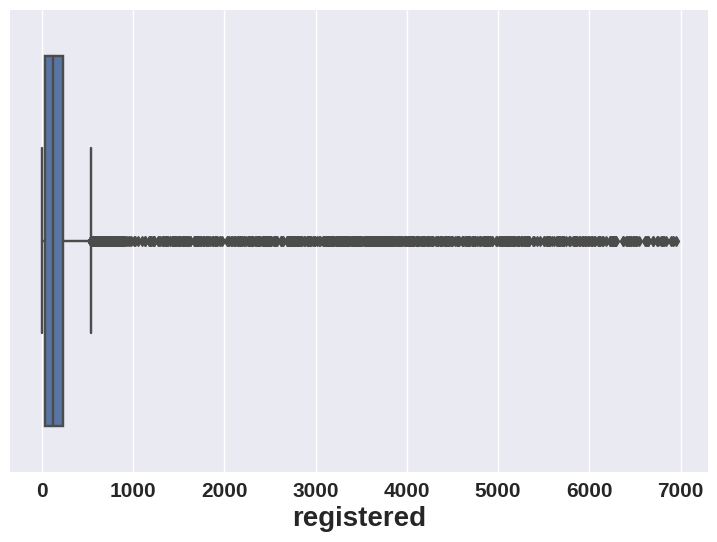

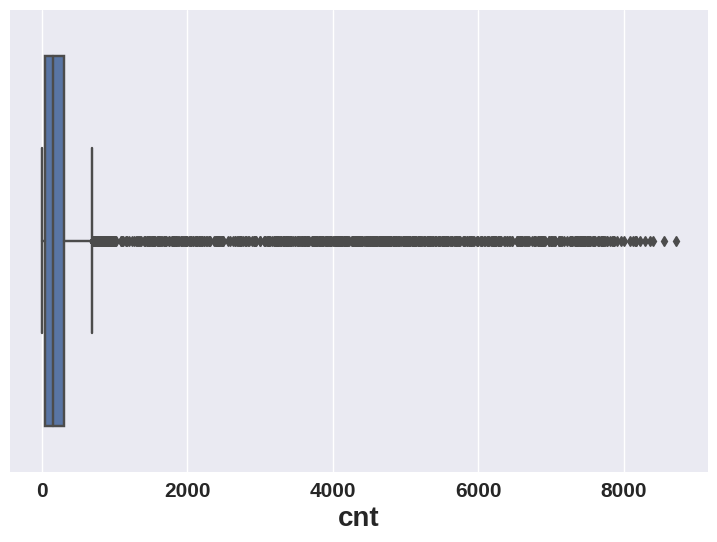

In [23]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

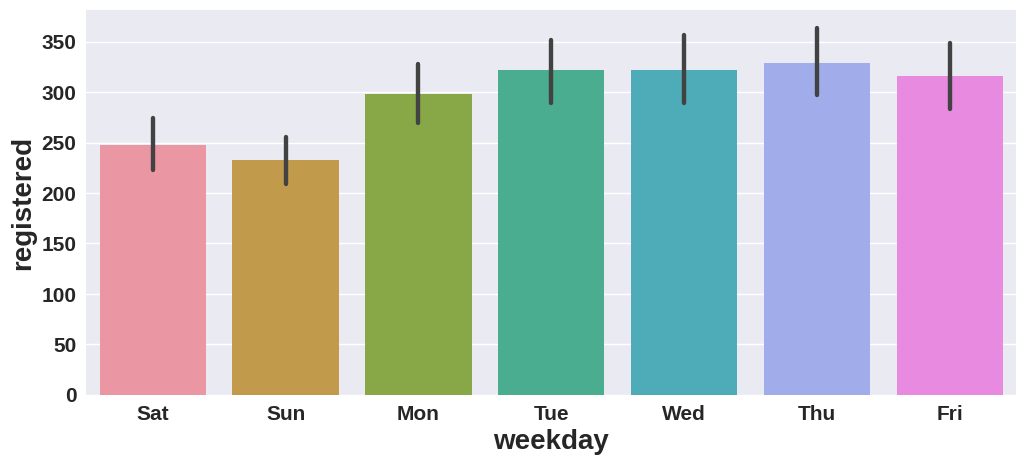

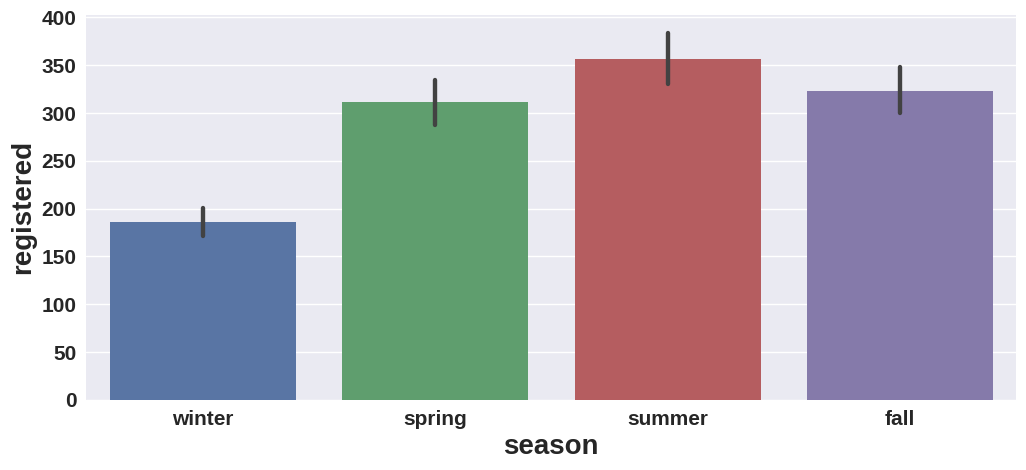

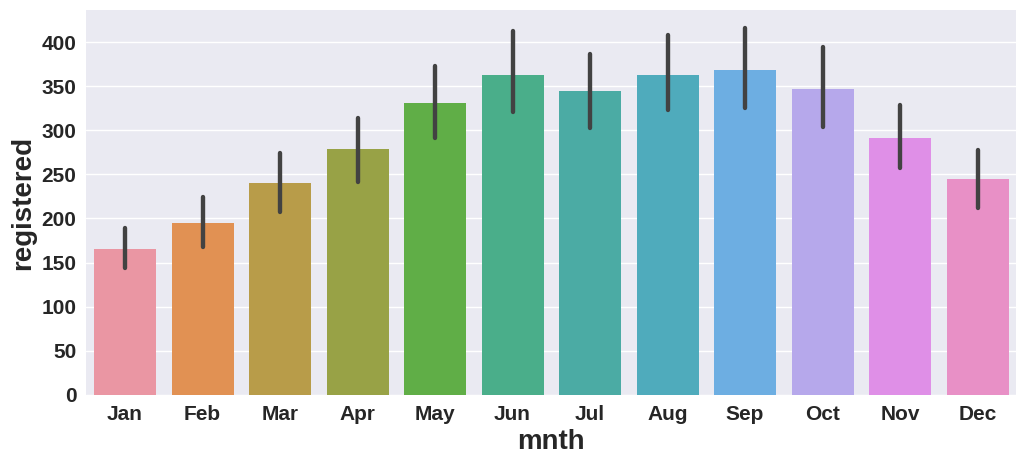

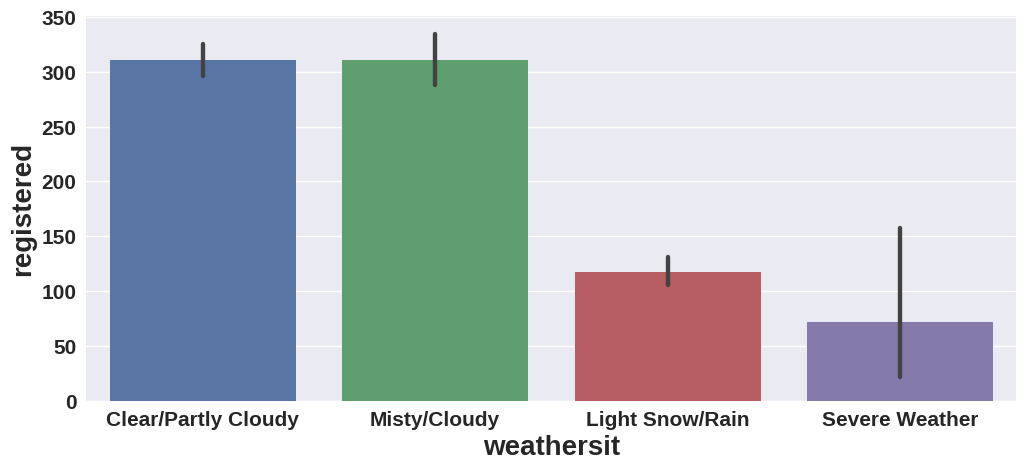

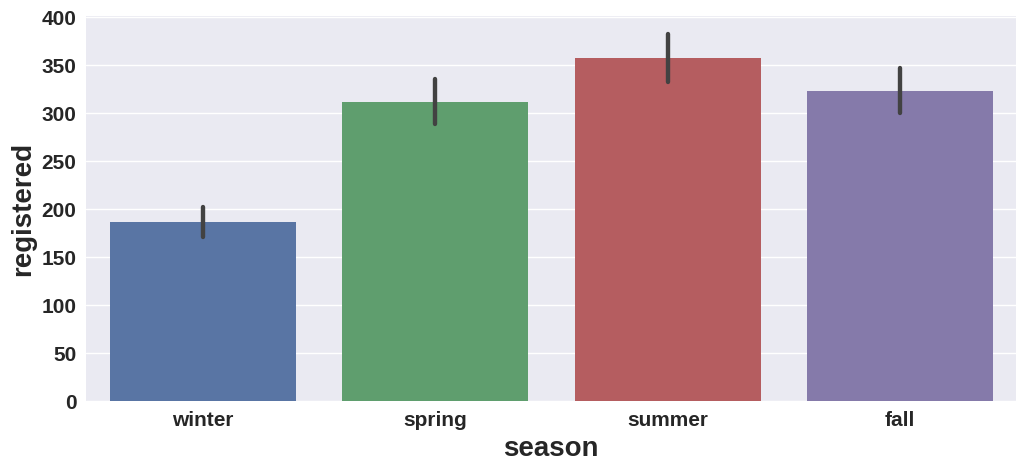

In [24]:
categorical_columns.extend(['season'])

# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = df[col],y = df['registered'])

Text(0.5, 1.0, 'Bike Rental Trend according to instant on season')

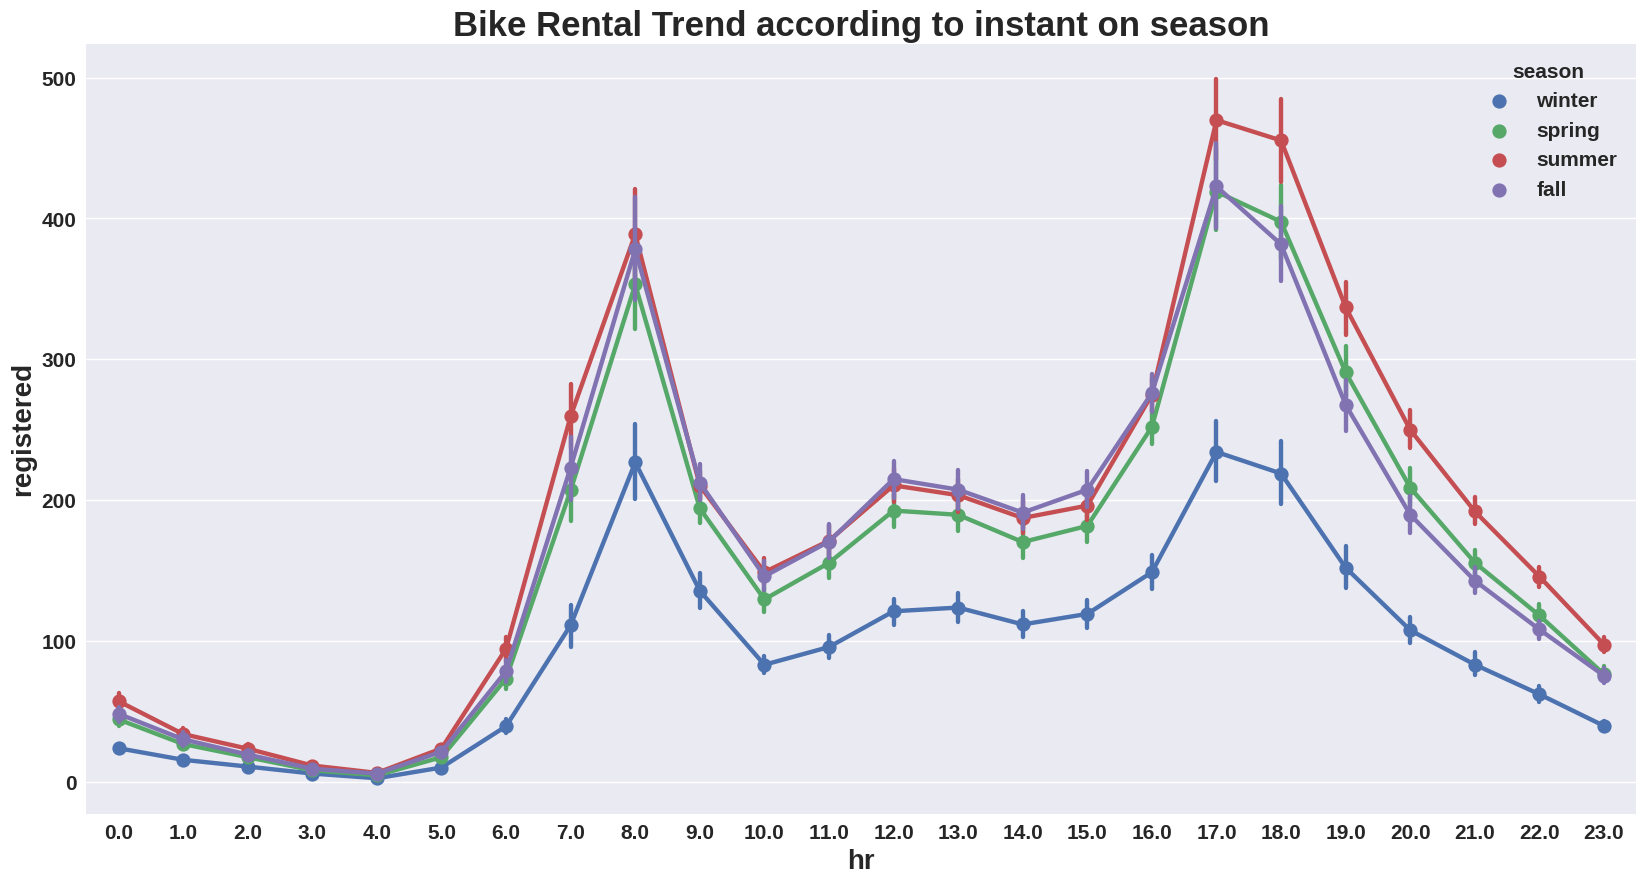

In [25]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['hr'],y = df['registered'],hue = df['season'])
plt.title("Bike Rental Trend according to instant on season")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on mouth')

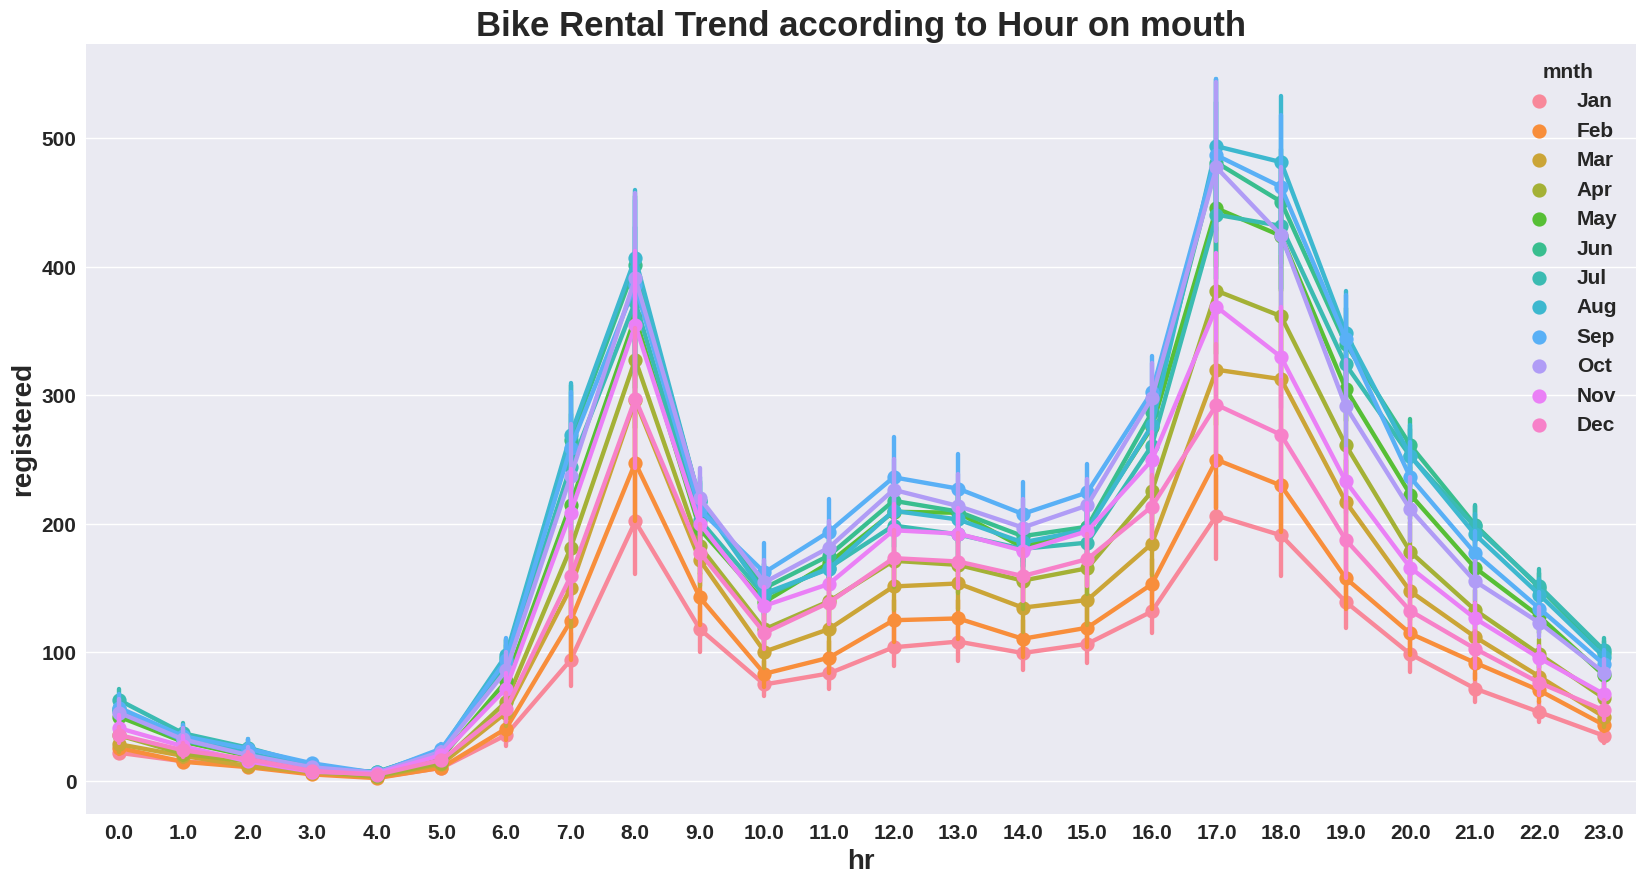

In [26]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['hr'],y = df['registered'],hue = df['mnth'])
plt.title("Bike Rental Trend according to Hour on mouth")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on weekday')

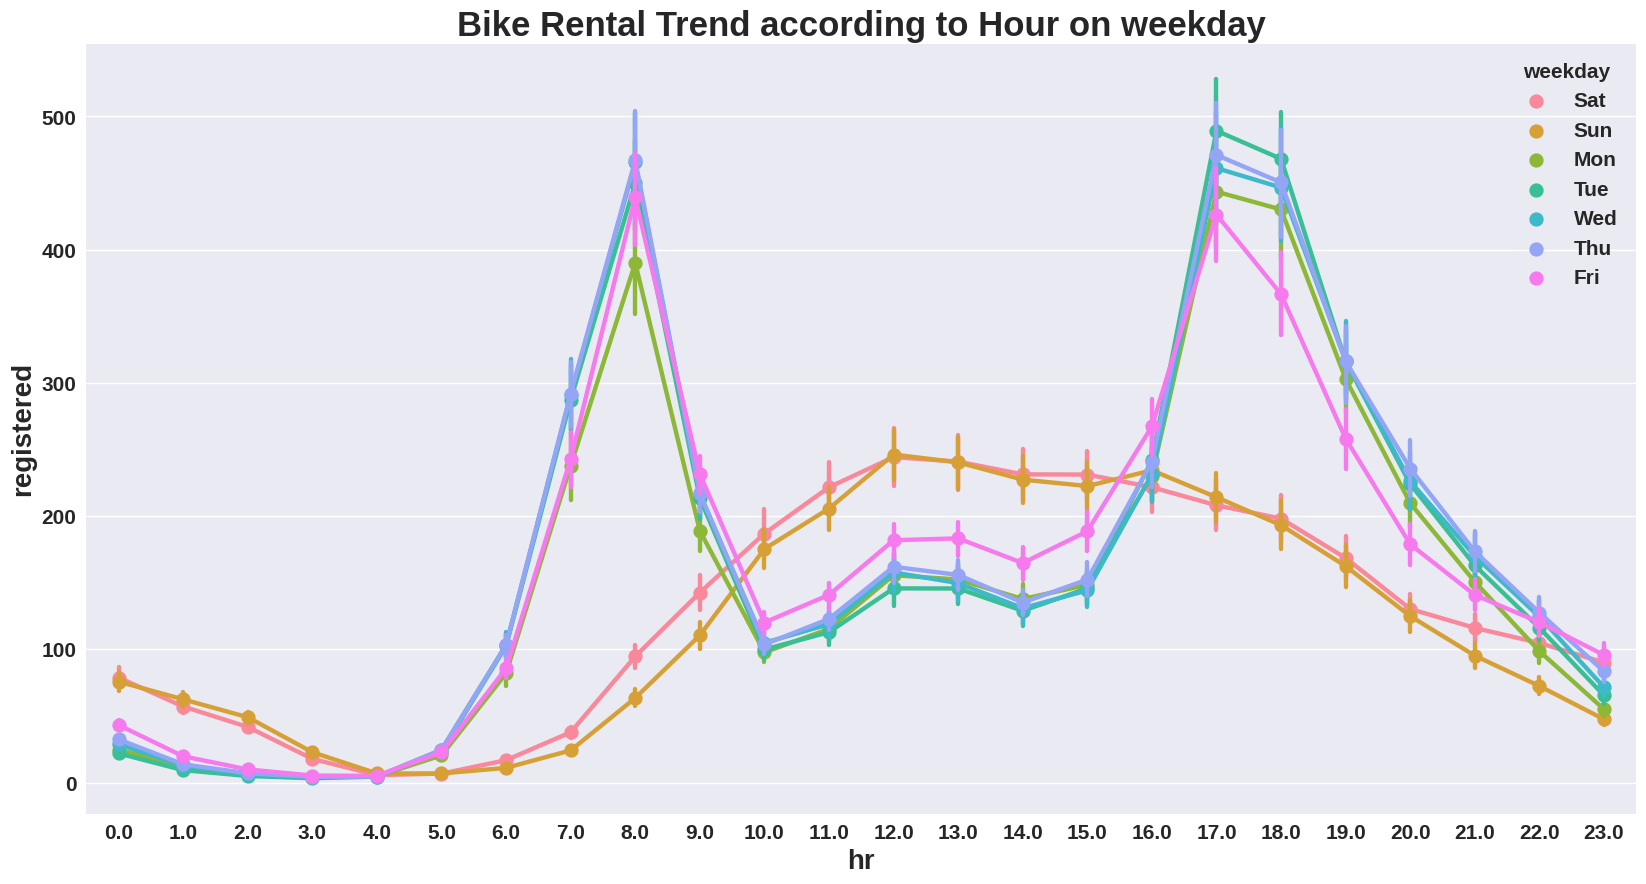

In [27]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['hr'],y = df['registered'],hue = df['weekday'])
plt.title("Bike Rental Trend according to Hour on weekday")

<Axes: xlabel='registered'>

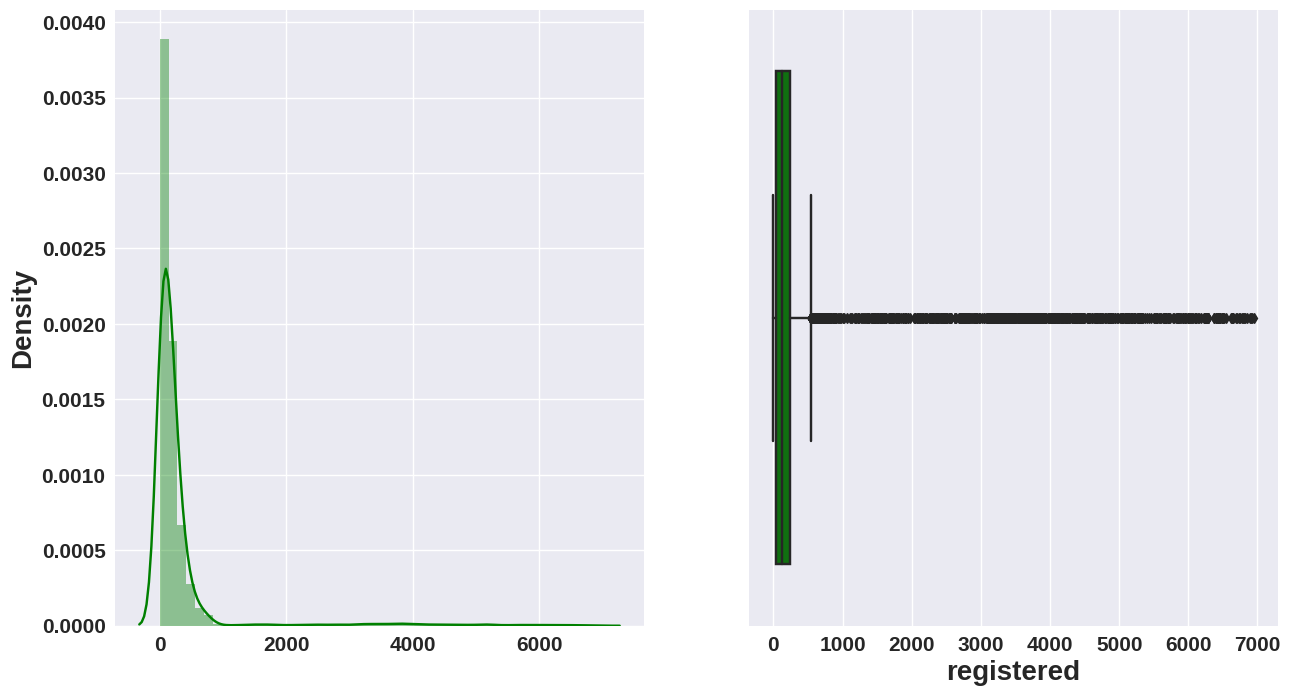

In [28]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['registered'],color='g',ax=axes[0])
sns.boxplot(x = df['registered'],color='g',ax=axes[1])

<Axes: >

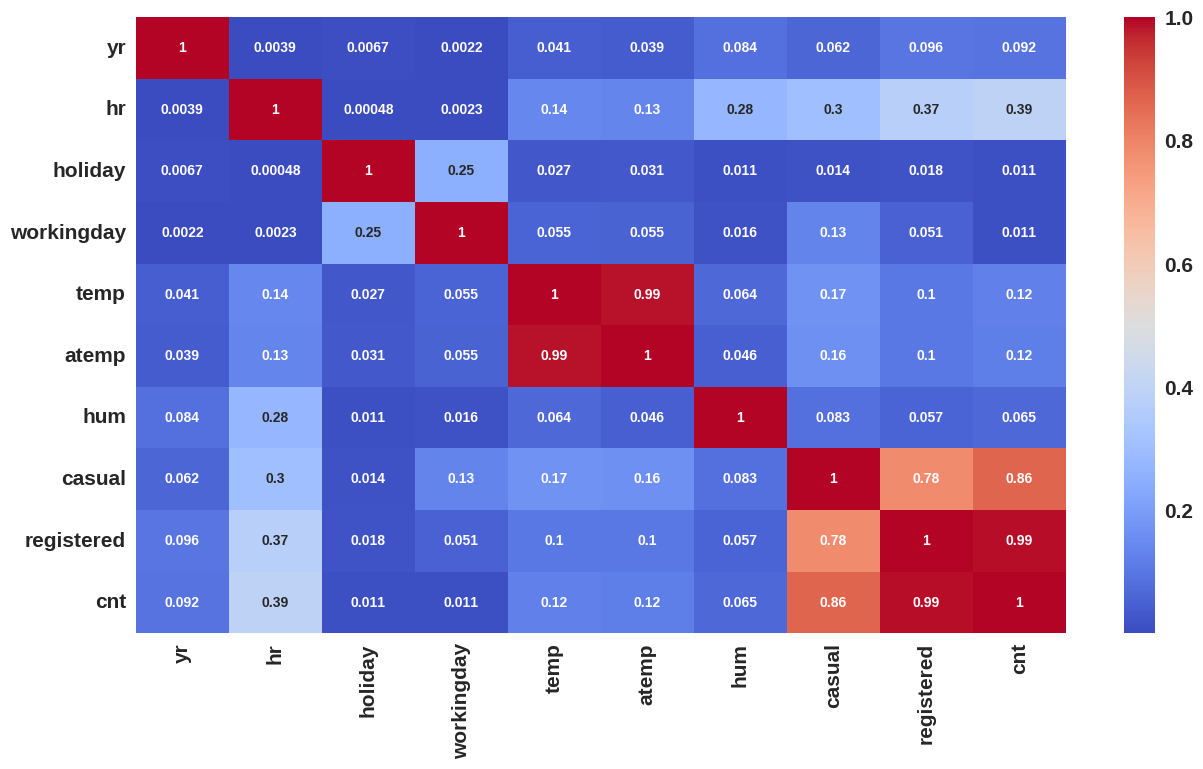

In [29]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

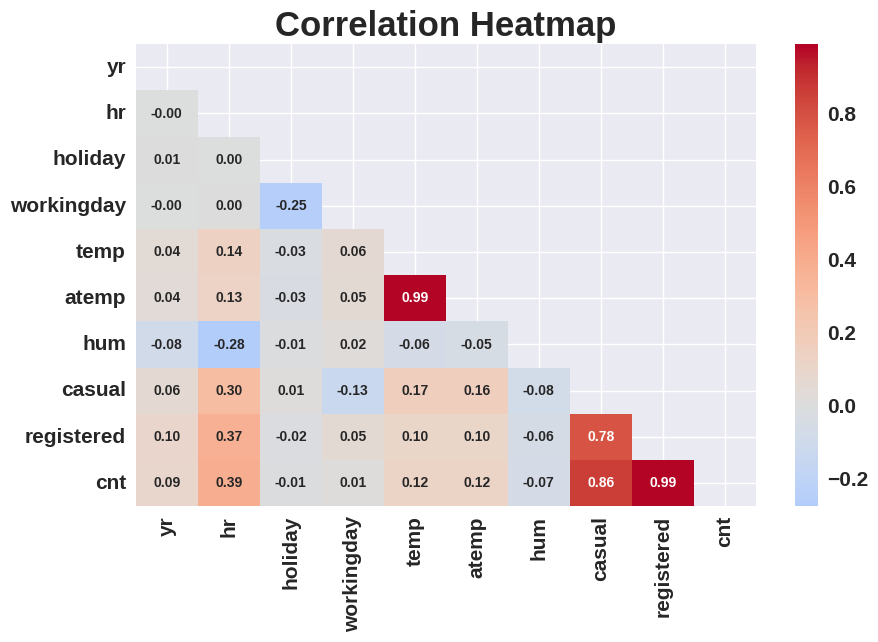

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

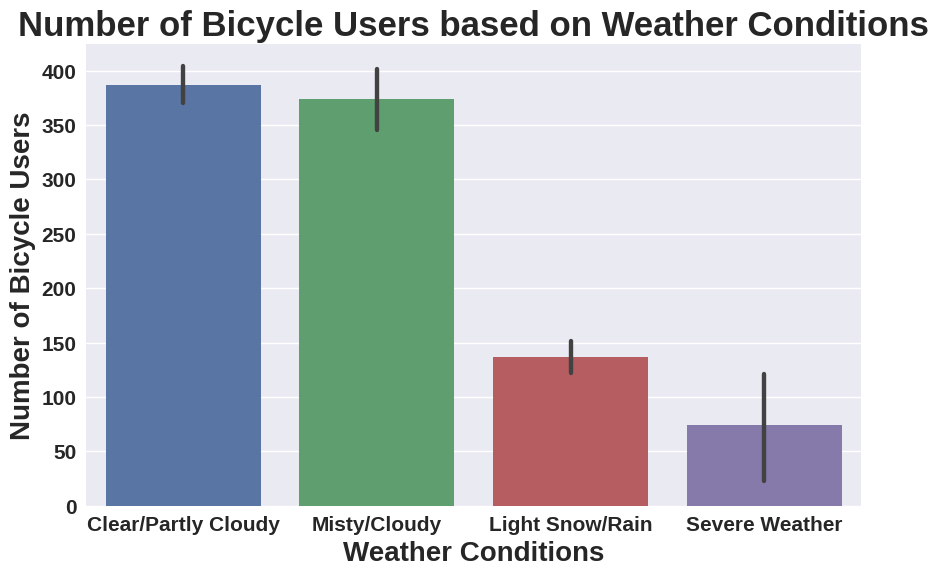

In [31]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=df)

plt.title('Number of Bicycle Users based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Bicycle Users')
plt.show()

Text(0.5, 1.0, 'Humidity vs Count')

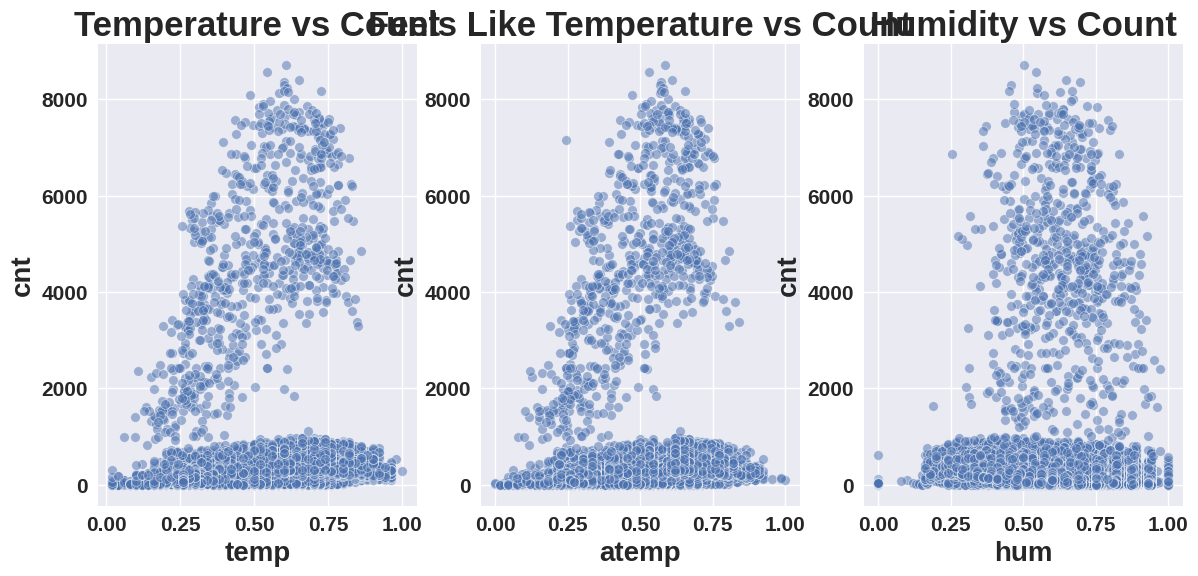

In [32]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='cnt',
    data=df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='cnt',
    data=df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='cnt',
    data=df,
    alpha=0.5
)
plt.title('Humidity vs Count')

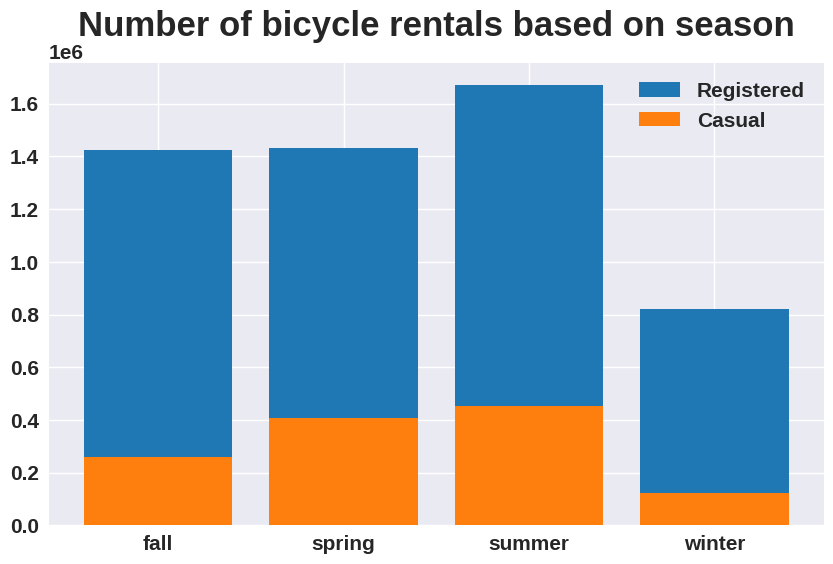

In [33]:
seasonal_usage = df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of bicycle rentals based on season')
plt.legend()
plt.show()

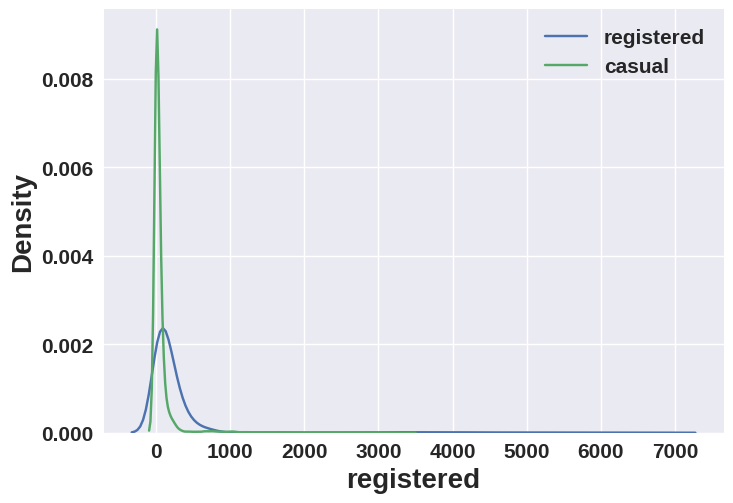

In [34]:
sns.kdeplot(df['registered'],label='registered')
sns.kdeplot(df['casual'],label='casual')
plt.legend()

In [35]:
df['Temp Buckets'] =  pd.qcut(df['temp'],4)

In [36]:
df['Temp Buckets'].value_counts()

(0.5, 0.66]      4985
(0.019, 0.34]    4956
(0.34, 0.5]      4271
(0.66, 1.0]      3898
Name: Temp Buckets, dtype: int64

In [37]:
grouping = df.groupby('Temp Buckets').mean()[['casual','registered','cnt']]
grouping['Difference'] =  grouping['registered']/grouping['casual']
grouping

,casual,registered,cnt,Difference
Temp Buckets,,,,
"(0.019, 0.34]",19.126715,173.341606,192.468321,9.062801
"(0.34, 0.5]",57.213767,282.945212,340.158979,4.945404
"(0.5, 0.66]",83.879238,336.340221,420.219458,4.009815
"(0.66, 1.0]",123.844023,410.756285,534.600308,3.316723


<Axes: title={'center': 'Exponential Change in registered By Temp Group'}, xlabel='Temp Buckets', ylabel='Difference'>

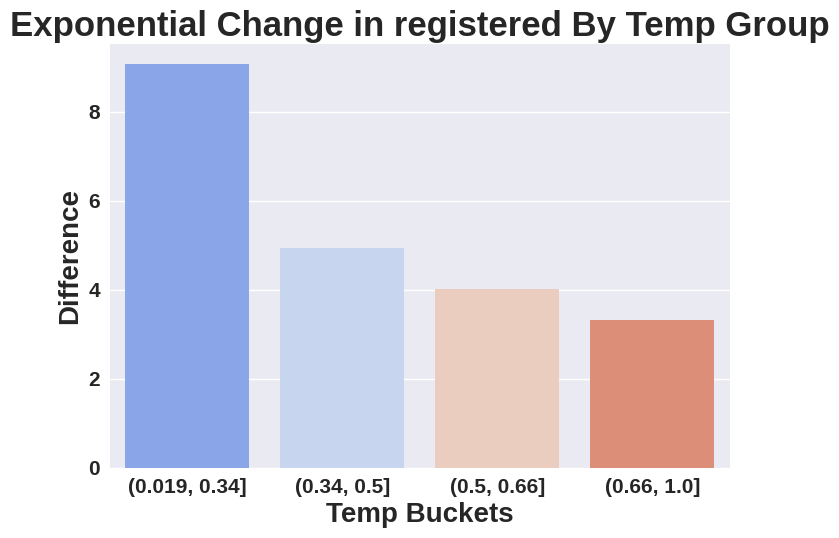

In [38]:
plt.title('Exponential Change in registered By Temp Group')
sns.barplot(data = grouping, x=grouping.index, y='Difference',palette='coolwarm')

## Conclusion

- It can be clearly seen that there is a relationship between the two. Bicycle renters really like it when the weather is sunny/slightly cloudy with Q3 above 6000 and Q1 less than 4000 and the median is almost 5000. Then the second position is occupied when the weather is foggy/cloudy with Q3 above 5000 and Q1 below 3000 and the median is above 4000. Lastly Users don't like it when the atmosphere is a little snowy/rainy with Q3 above 2000 and Q1 below 1000 and the median is above 1000. And for weather during big storms there is no data, because it is not possible to cycle in such weather conditions.

- visualization shown, it can be concluded that temp and atemp have a positive correlation with count, so that if temperature (temp and atemp) increases, then bicycle users also tend to increase. In contrast to Humidity which has a negative correlation with count, although it is very minimal (not very significant), it can still reduce the number of bicycle users when the humidity increases.

- the final visualization, it turns out that the results obtained are quite surprising, where winter is not the last, but the last is spring. This can be caused by many factors such as weather conditions, air temperature, working days, holidays, and so on. Meanwhile, the first place is occupied by autumn (Fall) which was able to achieve bicycle rentals of more than 800,000